In [1]:
from skimage.measure import compare_ssim as ssim
import matplotlib.pyplot as plt
import numpy as np
import cv2
from PIL import Image
import glob

In [9]:
MSE = [] 
SSIM =[]

def mse(imageA, imageB):
    # the 'Mean Squared Error' between the two images is the
    # sum of the squared difference between the two images;
    # NOTE: the two images must have the same dimension
    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])
    # return the MSE, the lower the error, the more "similar"
    # the two images are
    return err
 
def compare_images(imageA, imageB, title):
    # compute the mean squared error and structural similarity
    # index for the images
    m = mse(imageA, imageB)
    s = ssim(imageA, imageB)
    #MSE.append(m)
    #SSIM.append(s)
    # setup the figure
    fig = plt.figure(title)
    plt.suptitle("MSE: %.2f, SSIM: %.2f" % (m, s))
    # show first image
    ax = fig.add_subplot(1, 2, 1)
    plt.imshow(imageA, cmap = plt.cm.gray)
    plt.axis("off")
    # show the second image
    ax = fig.add_subplot(1, 2, 2)
    plt.imshow(imageB, cmap = plt.cm.gray)
    plt.axis("off")
    # show the images
    plt.show()

In [ ]:
# load the images -- the original, the original + contrast,
# and the original + photoshop
original = cv2.imread("results/042912A1_real_B.png")
output = cv2.imread("results/042912A1_fake_B.png")
 
# convert the images to grayscale
original = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
output = cv2.cvtColor(output, cv2.COLOR_BGR2GRAY)

In [ ]:
# initialize the figure
fig = plt.figure("Images")
images = ("Original", original), ("Output", output)
 
# loop over the images
for (i, (name, image)) in enumerate(images):
    # show the image
    ax = fig.add_subplot(1, 2, i + 1)
    ax.set_title(name)
    plt.imshow(image, cmap = plt.cm.gray)
    plt.axis("off")
# show the figure
plt.show()
# compare the images
#compare_images(original, original, "Original vs. Original")
compare_images(original, output, "Original vs. Output")

In [ ]:
image3 = cv2.subtract(output,original)
plt.imshow(image3, cmap = plt.cm.gray)
plt.title("Difference")
plt.show()

In [ ]:
from os import listdir
from os.path import isfile, join
import numpy
import cv2

mypath='results'
onlyfiles = [ f for f in listdir(mypath) if isfile(join(mypath,f)) ]
images = numpy.empty(len(onlyfiles), dtype=object)
for n in range(0, len(onlyfiles)):
  images[n] = cv2.imread( join(mypath,onlyfiles[n]) )

In [ ]:
plt.imshow(images[1])
plt.show()

In [ ]:
import cv2
import glob

images = [cv2.imread(file) for file in glob.glob('Real/*.png')]
images2 = [cv2.imread(file) for file in glob.glob('fake/*.png')]

In [ ]:
plt.imshow(images[1])
plt.show()

In [ ]:
plt.imshow(images2[46])
plt.show()

In [ ]:
print(MSE)
print(SSIM)

In [ ]:
#MSE.pop(-1)
#SSIM.pop(-1)

In [27]:
print(len(MSE))
print(len(SSIM))
x=list(range(0,50))

49
49


In [ ]:
plt.scatter(x,MSE)
plt.title("MSE")
plt.show()
print(min(MSE),max(MSE))
print(np.mean(MSE))
print(MSE.index(538.8857879638672))

In [ ]:
plt.scatter(x,SSIM)
plt.title("SSIM")
plt.show()
print(min(SSIM),max(SSIM))
print(np.mean(SSIM))
print(SSIM.index(0.6739305878492471))

In [ ]:
from sklearn.metrics import confusion_matrix
y_actu = original
y_pred = output
confusion_matrix(y_actu, y_pred)

# Evaluation Run 1

In [3]:
run1R = []
for filename in sorted(glob.glob('/Users/Airton/Desktop/Data/B/*B1.png')):
    im=Image.open(filename).convert('L')
    run1R.append(im)

In [4]:
run1F = []
for filename in sorted(glob.glob('/Users/Airton/Desktop/Data/F/*B.png')):
    im=Image.open(filename).convert('L')
    run1F.append(im)

In [5]:
print(len(run1F))
print(len(run1R))

49
49


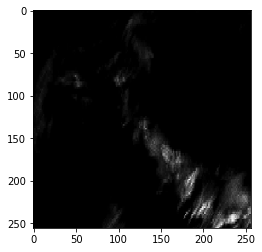

In [6]:
plt.imshow(np.array(run1R[0]),cmap='gray')
plt.show()

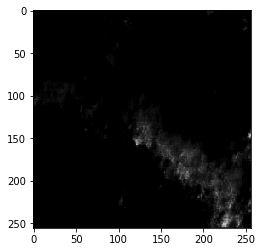

In [7]:
plt.imshow(np.array(run1F[0]),cmap='gray')
plt.show()

In [10]:
MSE = []
SSIM = []
for i in range(len(run1R)):
    m = mse(np.array(run1R[i]),np.array(run1F[i]))
    s = ssim(np.array(run1R[i]),np.array(run1F[i]))
    MSE.append(m)
    SSIM.append(s)

In [11]:
print(MSE)

[287.16587829589844, 84.21824645996094, 19.811355590820312, 79.10015869140625, 248.61802673339844, 190.52401733398438, 95.91621398925781, 95.04197692871094, 83.30058288574219, 235.05567932128906, 87.30947875976562, 33.26164245605469, 92.66152954101562, 73.02433776855469, 269.8690185546875, 154.45928955078125, 142.0358123779297, 244.41551208496094, 15.081588745117188, 30.872467041015625, 65.31134033203125, 272.52813720703125, 239.85543823242188, 546.5882568359375, 264.49644470214844, 113.66316223144531, 68.93101501464844, 153.1437530517578, 215.7307891845703, 57.76951599121094, 28.980056762695312, 68.11952209472656, 91.24888610839844, 101.51716613769531, 73.75254821777344, 85.79736328125, 73.95645141601562, 18.029541015625, 15.525466918945312, 57.57283020019531, 87.74534606933594, 23.288558959960938, 6.5163421630859375, 11.164718627929688, 45.18894958496094, 79.20207214355469, 137.1333770751953, 13.191680908203125, 2.8973541259765625]


In [12]:
print(SSIM)

[0.7437068610348295, 0.8071453514257659, 0.9837102950110285, 0.9129537660826379, 0.9551020992514005, 0.873711178384792, 0.9382046579151267, 0.9491299565581864, 0.85727883182708, 0.8120644751395141, 0.8341371113125, 0.8871020565825969, 0.8665119956138096, 0.8315476572663726, 0.7989430610890856, 0.894597950326306, 0.8534496403868042, 0.8264230530170565, 0.9813537508064732, 0.9400379716528204, 0.8941990391731413, 0.7734515438691084, 0.8616597204122277, 0.6709810432890365, 0.7047206038841652, 0.7801943657411768, 0.9761295258973006, 0.9112453373245212, 0.777529462120188, 0.8696586878034552, 0.9768122799051431, 0.8946506011183564, 0.9019513938650235, 0.8688535614864157, 0.8746286395674359, 0.8542319509444883, 0.8595900951403771, 0.968902281709867, 0.9402456959622062, 0.9384375035747177, 0.884322459131753, 0.9606513086284929, 0.9845614345085079, 0.9862179089522979, 0.9100885346085608, 0.8927482896803551, 0.8737293523730307, 0.9779117009981616, 0.9937564653520228]


In [13]:
x1=list(range(0,49))

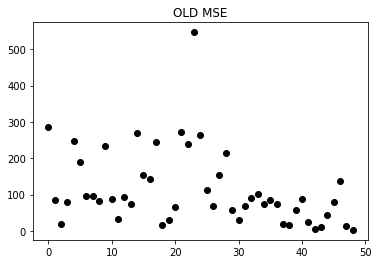

2.8973541259765625 546.5882568359375
113.88956934091996


In [14]:
plt.scatter(x1,MSE,c='black')
plt.title("OLD MSE")
plt.show()
print(min(MSE),max(MSE))
print(np.mean(MSE))

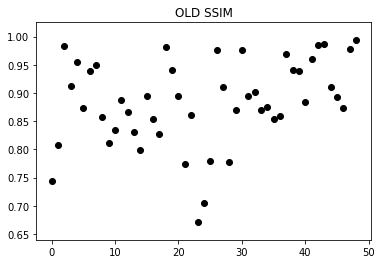

0.6709810432890365 0.9937564653520228
0.8838606634225659


In [15]:
plt.scatter(x1,SSIM,c='black')
plt.title("OLD SSIM")
plt.show()
print(min(SSIM),max(SSIM))
print(np.mean(SSIM))

# Evaluation Run 2

In [16]:
from PIL import Image
import glob
image_listA1 = []

for filename in sorted(glob.glob('/Users/Airton/Desktop/images/*real_B.png')):
    im=Image.open(filename).convert('L')
    image_listA1.append(im)

In [17]:
image_listA2 = []

for filename in sorted(glob.glob('/Users/Airton/Desktop/images/*fake_B.png')):
    im=Image.open(filename).convert('L')
    image_listA2.append(im)

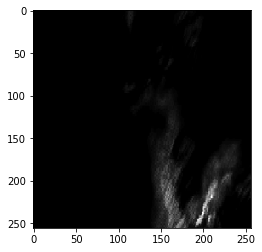

In [18]:
plt.imshow(np.array(image_listA1[0]),cmap='gray')
plt.show()

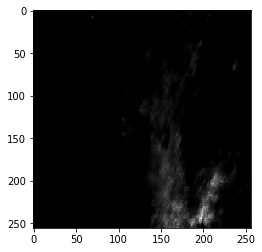

In [19]:
plt.imshow(np.array(image_listA2[0]),cmap='gray')
plt.show()

In [20]:
print(np.array(image_listA1[1]))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [21]:
mse(np.array(image_listA1[0]),np.array(image_listA2[0]))

131.75535583496094

In [22]:
ssim(np.array(image_listA1[0]),np.array(image_listA2[0]))

0.8104632798835872

In [23]:
MSE1 = []
SSIM1 = []
for i in range(len(image_listA1)):
    m = mse(np.array(image_listA1[i]),np.array(image_listA2[i]))
    s = ssim(np.array(image_listA1[i]),np.array(image_listA2[i]))
    MSE1.append(m)
    SSIM1.append(s)

In [24]:
print(MSE1)

[131.75535583496094, 128.32083129882812, 69.33480834960938, 114.59130859375, 89.13592529296875, 67.87240600585938, 57.55235290527344, 171.2384033203125, 97.76322937011719, 237.75119018554688, 104.62367248535156, 131.8997039794922, 253.30491638183594, 336.6425323486328, 70.82469177246094, 123.17013549804688, 234.21791076660156, 236.73719787597656, 91.84942626953125, 180.93370056152344, 145.58056640625, 121.31417846679688, 187.21107482910156, 133.6106719970703, 67.7845458984375, 139.74612426757812, 194.86944580078125, 108.96170043945312, 240.7487335205078, 220.95169067382812, 44.23155212402344, 93.37855529785156, 48.247711181640625, 95.86820983886719, 90.55743408203125, 54.49314880371094, 54.97406005859375, 132.14451599121094, 266.36192321777344, 83.51454162597656, 76.66363525390625, 64.85169982910156, 76.46852111816406, 53.82099914550781, 80.19471740722656, 78.26194763183594, 87.31692504882812, 95.97132873535156, 70.13563537597656, 66.52210998535156]


In [25]:
print(SSIM1)

[0.8104632798835872, 0.8535117162736573, 0.8855115975865853, 0.8902430992358322, 0.9394917365097974, 0.9242491567038903, 0.8768515333824127, 0.812580623912952, 0.8188276059137682, 0.8175244177886716, 0.8259112337374741, 0.9047978671128555, 0.8406196460999114, 0.7837364807633057, 0.9320692566585123, 0.8405247960556614, 0.8325131697646739, 0.8595529478034779, 0.884856592903737, 0.896809996149835, 0.9052669709922877, 0.9399207618331472, 0.9421902335477637, 0.877513221454988, 0.9070514138059843, 0.8810404579129129, 0.868186609744865, 0.8670870723501989, 0.9384512278235828, 0.927817415600871, 0.9374138185184946, 0.8475335835687211, 0.9381923930180402, 0.8765649212393849, 0.864082187428482, 0.8588142928774155, 0.8510165640971319, 0.8850354822783771, 0.8102374331864155, 0.8858675543254779, 0.8914394526780313, 0.8966355385214372, 0.8789174327734545, 0.8250067113762914, 0.826033005532922, 0.8464971360475726, 0.8599425514481859, 0.8224819375393518, 0.8516684189670409, 0.8739519403777976]


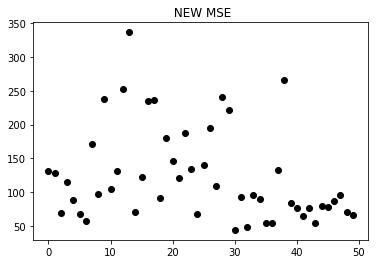

44.23155212402344 336.6425323486328
124.08555206298828


In [28]:
plt.scatter(x,MSE1,c='black')
plt.title(" NEW MSE")
plt.show()
print(min(MSE1),max(MSE1))
print(np.mean(MSE1))

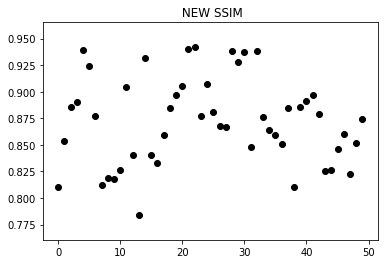

0.7837364807633057 0.9421902335477637
0.8722500899021446


In [29]:
plt.scatter(x,SSIM1,c='black')
plt.title(" NEW SSIM")
plt.show()
print(min(SSIM1),max(SSIM1))
print(np.mean(SSIM1))

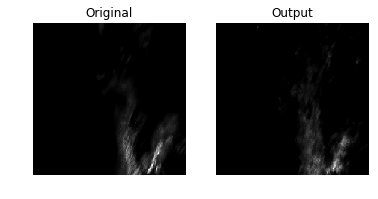

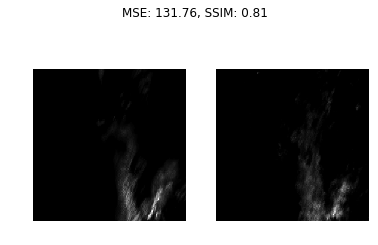

In [30]:
original = np.array(image_listA1[0])
output = np.array(image_listA2[0])
# initialize the figure
fig = plt.figure("Images")
images = ("Original", original), ("Output", output)
 
# loop over the images
for (i, (name, image)) in enumerate(images):
    # show the image
    ax = fig.add_subplot(1, 2, i + 1)
    ax.set_title(name)
    plt.imshow(image, cmap = plt.cm.gray)
    plt.axis("off")
# show the figure
plt.show()
# compare the images
#compare_images(original, original, "Original vs. Original")
compare_images(original, output, "Original vs. Output")

# Confusion Matrix

In [31]:
from sklearn.metrics import confusion_matrix

In [32]:
Fthr = []
Fthf = []
for i in range(len(image_listA1)):
    gray_img= np.array(image_listA1[i])
    gray_img2= np.array(image_listA2[i])
    th1 = cv2.threshold(gray_img,1,255,cv2.THRESH_BINARY)
    th2 = cv2.threshold(gray_img2,1,255,cv2.THRESH_BINARY)
    Fr = list(th1[1].flatten())
    Ff = list(th2[1].flatten())
    Fthr.append(Fr)
    Fthf.append(Ff)

In [ ]:
plt.imshow(Thr[0][1],cmap = 'gray')
plt.show()

In [ ]:
plt.imshow(Thf[0][1],cmap = 'gray')
plt.show()

In [ ]:
Fthr = []
Fthf = []
for i in range(len(Thr)):
    Fr = list(Thr[i][1].flatten())
    Ff = list(Thf[i][1].flatten())
    Fthr.append(Fr)
    Fthf.append(Ff)

In [33]:
TN,FP,FN,TP = 0,0,0,0
TN1,FP1,FN1,TP1 = 0,0,0,0

In [ ]:
print(Fthr[1])

In [34]:
for i in range(len(Fthr)):
    tn,fp,fn,tp=confusion_matrix(Fthr[i], Fthf[i]).ravel()
    TN = TN+tn
    FP = FP +fp
    FN = FN +fn
    TP = TP +tp

In [ ]:
print("            ", "True-", "False+", "False-", "True+")
print("Old run:   ", 2829160, 87329, 141761, 153014)
print("New run:   ",TN,FP,FN,TP)
print("Difference: ",TN-2829160, FP-87329, FN-141761, TP-153014)

Old run:    2829160 87329 141761 153014
New run:    2813072 143918 93857 225953
Difference:  -16088 56589 -47904 72939

In [45]:
Fthr1 = []
Fthf1 = []
for i in range(len(run1R)):
    gray_img= np.array(run1R[i])
    gray_img2= np.array(run1F[i])
    th1 = cv2.threshold(gray_img,1,255,cv2.THRESH_BINARY)
    th2 = cv2.threshold(gray_img2,1,255,cv2.THRESH_BINARY)
    Fr = list(th1[1].flatten())
    Ff = list(th2[1].flatten())
    Fthr1.append(Fr)
    Fthf1.append(Ff)

In [46]:
for i in range(len(Fthr1)):
    tn,fp,fn,tp=confusion_matrix(Fthr1[i], Fthf1[i]).ravel()
    TN1 = TN1 +tn
    FP1 = FP1 +fp
    FN1 = FN1 +fn
    TP1 = TP1 +tp

In [ ]:
print("             ", "TN", "   ", "FP","   ", "FN","   ", "TP")
print("Old run:    ",TN1,FP1,FN1,TP1)
print("New run:    ",TN,FP,FN,TP)
print("Difference: ",TN-TN1, FP-FP1, FN-FN1, TP-TP1)

In [47]:
Total = TN+FP+FN+TP
Total1 = TN1+FP1+FN1+TP1

In [48]:
print("Old run %:    ",(TN1/Total1)*100,(FP1/Total1)*100,(FN1/Total1)*100,(TP1/Total1)*100)
print("New run %:    ",(TN/Total)*100,(FP/Total)*100,(FN/Total)*100,(TP/Total)*100)

Old run %:     90.57727735869739 2.0966977489237886 3.7869667520328445 3.5390581403459818
New run %:     85.84814453125 4.39202880859375 2.864288330078125 6.895538330078126


In [49]:
PTN = (TN/Total)*100
PFP = (FP/Total)*100
PFN = (FN/Total)*100
PTP = (TP/Total)*100

In [50]:
Correct = PTN + PTP
Wrong = PFN + PFP
print("Correct = ", Correct, " Wrong = ", Wrong)

Correct =  92.74368286132812  Wrong =  7.256317138671875


In [51]:
PTN1 = (TN1/Total1)*100
PFP1 = (FP1/Total1)*100
PFN1 = (FN1/Total1)*100
PTP1 = (TP1/Total1)*100

In [52]:
Correct = PTN1 + PTP1
Wrong = PFN1 + PFP1
print("Correct = ", Correct, " Wrong = ", Wrong)

Correct =  94.11633549904337  Wrong =  5.883664500956633


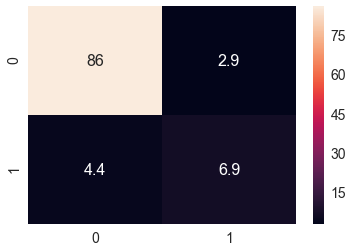

In [53]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

array = [[PTN,PFN],
        [PFP,PTP]]        
df_cm = pd.DataFrame(array, range(2),
                  range(2))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16})# font size

In [57]:
NF = FN+TN
NP = FP+TP
NPTN = (TN/NF)
NPFP = (FP/NP)
NPFN = (FN/NF)
NPTP = (TP/NP)

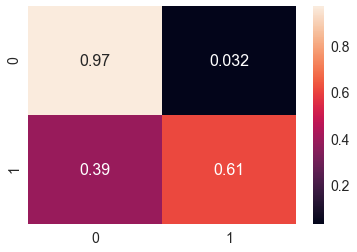

In [58]:
array = [[NPTN,NPFN],[NPFP,NPTP]]        
df_cm = pd.DataFrame(array, range(2),
                  range(2))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16})# font size